In [11]:
# Question 1 starts here
import cv2
testimg = cv2.imread('testimg.png',0)
cv2.imshow('show',testimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# Question 2 starts here
import numpy as np
# describe a simple house in a selected world coordinate system:
lines = [('a' , ['A','b','e']),
         ('b' , ['a','B','c']),
         ('c' , ['e','d','C','b']),
         ('d' , ['e','D','c']),
         ('e' , ['a','c','d','E']),
         ('A' , ['a','B','E']),
         ('B' , ['A','b','C']),
         ('C' , ['E','D','c','B']),
         ('D' , ['E','d','C']),
         ('E' , ['A','C','D','e']),
        ]
lines_dict = {'a' : ['A','b','e'],
              'b' : ['a','B','c'],
              'c' : ['e','d','C','b'],
              'd' : ['e','D','c'],
              'e' : ['a','c','d','E'],
              'A' : ['a','B','E'],
              'B' : ['A','b','C'],
              'C' : ['E','D','c','B'],
              'D' : ['E','d','C'],
              'E' : ['A','C','D','e'],
}
coords = [('a' , np.array([0, 0, 0])),
          ('b' , np.array([8, 0, 0])),
          ('c' , np.array([8, 0, 6])),
          ('d' , np.array([4, 0, 10])),
          ('e' , np.array([0, 0, 6])),
          ('A' , np.array([0, 7, 0])),
          ('B' , np.array([8, 7, 0])),
          ('C' , np.array([8, 7, 6])),
          ('D' , np.array([4, 7, 10])),
          ('E' , np.array([0, 7, 6])),
          ]
coords_dict = { 'a' : np.array([0, 0, 0]),
                'b' : np.array([8, 0, 0]),
                'c' : np.array([8, 0, 6]),
                'd' : np.array([4, 0, 10]),
                'e' : np.array([0, 0, 6]),
                'A' : np.array([0, 7, 0]),
                'B' : np.array([8, 7, 0]),
                'C' : np.array([8, 7, 6]),
                'D' : np.array([4, 7, 10]),
                'E' : np.array([0, 7, 6]),
}

house_coords = np.column_stack([n[1] for n in coords])


In [4]:
for (a,b) in lines:
    lines_dict[a] = b
lines_dict

{'a': ['A', 'b', 'e'],
 'b': ['a', 'B', 'c'],
 'c': ['e', 'd', 'C', 'b'],
 'd': ['e', 'D', 'c'],
 'e': ['a', 'c', 'd', 'E'],
 'A': ['a', 'B', 'E'],
 'B': ['A', 'b', 'C'],
 'C': ['E', 'D', 'c', 'B'],
 'D': ['E', 'd', 'C'],
 'E': ['A', 'C', 'D', 'e']}

In [13]:
M_ext=np.array([[0.707,0.707,0,-3],[-0.707,0.707,0,-0.5],[0,0,1,3]])
M_int=np.array([[-100,0,200],[-0,-100,200],[0,0,1]])

In [14]:
# augmented P matrix with extra "1" as the fourth component:
P = np.append(house_coords, [np.ones((house_coords.shape[1]),  dtype=house_coords.dtype)], 0)

In [15]:
proj_coords = M_int.dot((M_ext.dot(P)))
pixel_coords = np.divide(proj_coords, proj_coords[2])

In [16]:
pixel_coords = np.divide(proj_coords, proj_coords[2])
pixel_coords = pixel_coords[:-1]

In [17]:
projected_dict = {}
for n in range(pixel_coords.shape[1]):
  projected_dict[lines[n][0]] = pixel_coords.T[n]
projected_dict

{'a': array([300.        , 216.66666667]),
 'b': array([111.46666667, 405.2       ]),
 'c': array([170.48888889, 268.4       ]),
 'd': array([201.32307692, 225.6       ]),
 'e': array([233.33333333, 205.55555556]),
 'A': array([135.03333333,  51.7       ]),
 'B': array([-53.5       , 240.23333333]),
 'C': array([115.5       , 213.41111111]),
 'D': array([163.25384615, 187.53076923]),
 'E': array([178.34444444, 150.56666667])}

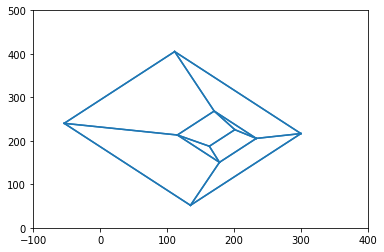

In [18]:
# using Line2D to plot the projected "house"
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
projected_lines = []

for v in lines_dict.keys():
  for p in lines_dict[v]:
    projected_lines.append(Line2D([projected_dict[v][0], projected_dict[p][0]], [projected_dict[v][1], projected_dict[p][1]]))
    ax.add_line(projected_lines[-1])
ax.axis([-100,400,0,500])
plt.show()

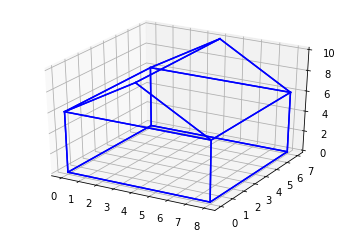

In [9]:
# draw the original "house" in a 3D point of view (for reference only)
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
for v in lines_dict.keys():
  for p in lines_dict[v]:
    line_to_plot = np.column_stack((coords_dict[v], coords_dict[p]))
    ax.plot(line_to_plot[0], line_to_plot[1], line_to_plot[2], color='blue')
plt.show()